1. Gauss Seidel
2. Least Square Regression
3. Newton Rhapson
4. Riemann

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Latihan Soal UAP


no 1


In [5]:
mX = [
        [
            [10, 2, -6],
            [-1, 4, 2],
            [2, 3, 6]
        ],
        [
            [-5, 2, -8],
            [4, -3, -9],
            [-8, -10, 9]
        ],
        [
            [10, -5, 3, 0],
            [3, -9, 2, -2],
            [-8, 0, 17, -4],
            [3, -3, -8, -15]
        ],
]

mY = [
    [17, -4, -12],
    [13, -7, -2],
    [9, 10, -10, -18]
]


def checkDiagonallyDominance(x):
    x = np.array(x)
    diagonal = np.diag(np.abs(x))
    sumwithoutdiagonal = np.sum(np.abs(x), axis=1) - diagonal

    # printed = 0

    # for i in range(len(x)):
    #     print(f"Diagonal {i+1} =", {diagonal[i]})
    #     print("Total Not Diagonal Value =",end=" ")
    #     for j, el in enumerate(x[i]):
    #         if j != i:
    #             if printed != 0:
    #                 print("+", end=" ")
    #             print(f"|{el}|", end=" ")
    #             printed += 1
    #     print(f"= {sumwithoutdiagonal[i]}")

    #     if diagonal[i] > sumwithoutdiagonal[i]:
    #         print(f"{diagonal[i]} > {sumwithoutdiagonal[i]}")
    #     else :
    #         print(f"{diagonal[i]} < {sumwithoutdiagonal[i]}")
    #         return False
    # return True

    if np.all(diagonal > sumwithoutdiagonal):
        return True
    else:
        return False
    
for i, x in enumerate(mX):
    print(f"Equation {i+1} array X")
    if checkDiagonallyDominance(x):
        print("Diagonally Dominance")
    else:
        print("Not Diagonally Dominance")
    print()
    print()

Equation 1 array X
Diagonally Dominance


Equation 2 array X
Not Diagonally Dominance


Equation 3 array X
Diagonally Dominance




no 2


In [8]:
def gausseidel(x, y , epsilon, max):
    x = np.array(x)
    y = np.array(y)
    diag = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)
    xBefore = np.zeros(x.shape[0])
    for i in range(max):
        xNew = np.array(xBefore)
        for j ,row in enumerate(x):
            xNew[j] = (y[j] + np.dot(row, xNew)) / diag[j]

        # euclidian distance
        distance = np.sqrt(np.dot(xNew - xBefore, xNew - xBefore))
        print(f"iteration : {i+1} | X1 = {xNew[0]}, X2 = {xNew[1]}, X3 = {xNew[2]}")
        if distance < epsilon:
            return True
        
        xBefore = xNew
    return False


for i, (x,y) in enumerate(zip(mX,mY)):
    print(f"Equation {i+1} array X")
    if(checkDiagonallyDominance(x)):
        gausseidel(x,y,0.01456,5)
    else:
        print("Not Diagonally Dominance")
    print()
    print()


Equation 1 array X
iteration : 1 | X1 = 1.7, X2 = -0.575, X3 = -2.279166666666667
iteration : 2 | X1 = 0.44749999999999995, X2 = 0.25145833333333334, X3 = -2.2748958333333333
iteration : 3 | X1 = 0.2847708333333333, X2 = 0.2086406249999999, X3 = -2.1992439236111108
iteration : 4 | X1 = 0.3387255208333334, X2 = 0.18430334201388865, X3 = -2.2050601779513888
iteration : 5 | X1 = 0.34010322482638883, X2 = 0.18755589518229154, X3 = -2.207145689199942


Equation 2 array X
Not Diagonally Dominance


Equation 3 array X
iteration : 1 | X1 = 0.9, X2 = -0.8111111111111111, X3 = -0.16470588235294117
iteration : 2 | X1 = 0.5438562091503268, X2 = -1.3286637618010166, X3 = 0.051241830065359546
iteration : 3 | X1 = 0.2202955700798838, X2 = -1.3701088517711613, X3 = -0.12052560980819346
iteration : 4 | X1 = 0.25110325705687736, X2 = -1.4058293186275828, X3 = -0.09774877089058819
iteration : 5 | X1 = 0.2264099719533851, X2 = -1.4092562235346036, X3 = -0.10909667368188802




no 3


𝛽=(𝐴^𝑇 𝐴)^−1 𝐴^𝑇 𝑌 ini rumus nya

[[ 6.13333333]
 [23.66666667]]


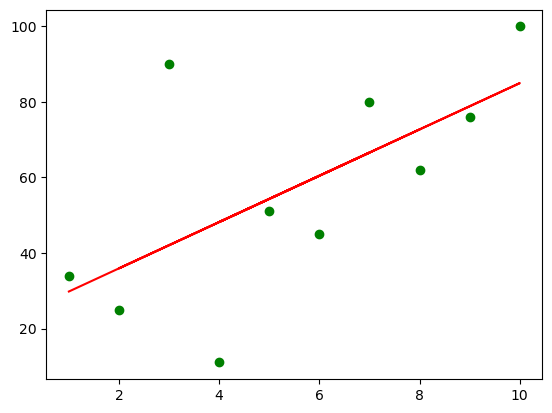

In [35]:
lx = [1, 5, 7, 2, 3, 9, 10, 4, 6, 8]
ly = [34, 51, 80, 25, 90, 76, 100, 11, 45, 62]

lx = np.array(lx)
ly = np.array(ly)

A = np.vstack([lx, np.ones(len(lx))]).T
Y = np.vstack(ly)
beta = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), Y)
print(beta)
# hasilnnya
# [[ 6.13333333] ini m
#  [23.66666667]] ini c

m = beta[0]
c = beta[1]

# y = mx + c
y = m * lx + c

# plotting
plt.plot(lx, ly, 'go')
plt.plot(lx, y, 'r')
plt.show()

no 4


In [2]:
from sympy import *

x = Symbol('x')

f1 = lambda x: 7*x**4 - 3*x**2 + x
df1 = diff(f1(x), x)
df1 = lambdify(x, df1, 'numpy')

f2 = lambda x: 8*x**6 + 5*x**4 - 2
df2 = diff(f2(x), x)
df2 = lambdify(x, df2, 'numpy')


#rumus x0 - (f(x0)/f'(x0))
def newton_rhapson(f, df, x0, tolerance, max):
    if max == 0:
        print("Max Iteration")
        return False
    if np.abs(f(x0)) < tolerance:
        print("Root =", x0)
        return True
    else:
        return newton_rhapson(f, df, x0 - f(x0)/df(x0), tolerance, max-1)

newton_rhapson(f1, df1, 1, 0.006541,5)
newton_rhapson(f2, df2, 1, 0.006541,5)

Max Iteration
Root = 0.6903195287760319


True

no 5

In [15]:
def f(x):
    return 3*x**4 - 7*x**2 + 5

batasBawah = -4
batasAtas = 3
n = 30

boxWidth = (batasAtas - batasBawah) / (n-1)
x = np.linspace(batasBawah, batasAtas, n)

#left riemnann sum
xLeft = x[:-1]
yLeft = f(xLeft)
leftRiemannSum = boxWidth * np.sum(np.abs(yLeft))
print("leftRiemann: ",leftRiemannSum)

#rigth riemnann sum
xRight = x[1:]
yRight = f(xRight)
rightRiemannSum = boxWidth * np.sum(np.abs(yRight))
print("rightRiemann: ",rightRiemannSum)

#mid riemnann sum
xMid = (xLeft+xRight)/2
yMid = f(xMid)
midRiemannSum = boxWidth * np.sum(np.abs(yMid))
print("midRiemann: ",midRiemannSum)

#trpaizoid riemnann sum
trapezoid = np.sum(np.abs(yLeft) + np.abs(yRight))/2 * boxWidth
print("trapezoid: ",trapezoid)

leftRiemann:  645.1387652149571
rightRiemann:  530.2422134908192
midRiemann:  580.4556464297783
trapezoid:  587.690489352888
